In [14]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.cross_validation import train_test_split
from pandas.tools.plotting import scatter_matrix
from sklearn.svm import SVC
%matplotlib inline

In [15]:
data = pd.read_csv('data/footballData.csv')

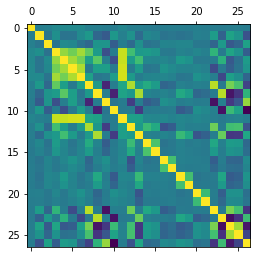

In [19]:
plt.matshow(data.corr())

In [4]:
data.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2000-08-19,Charlton,Man City,4,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,2000-08-19,Chelsea,West Ham,4,2,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-4.0
2,2,2000-08-19,Coventry,Middlesbrough,1,3,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0
3,3,2000-08-19,Derby,Southampton,2,2,NH,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0
4,4,2000-08-19,Leeds,Everton,2,0,H,0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,-10.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


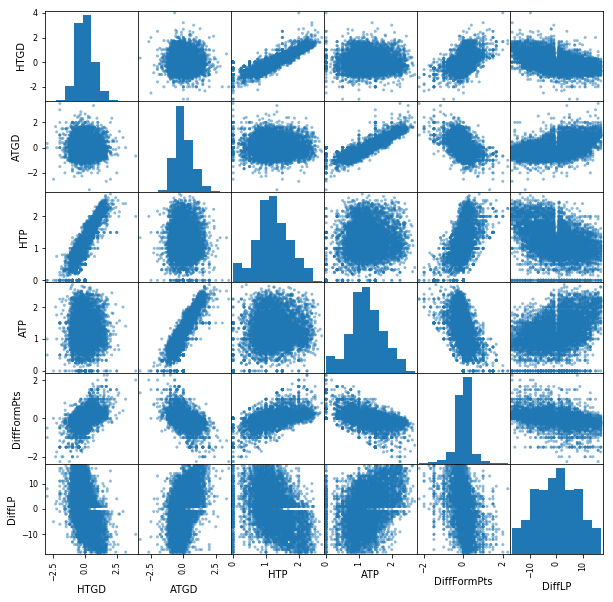

In [13]:
scatter_matrix(data[['HTGD','ATGD','HTP','ATP','DiffFormPts','DiffLP']], figsize=(10,10));

In [6]:
X_all = data.drop(['FTR'],1)
y_all = data['FTR']

In [7]:
cols = [['HTGD','ATGD','HTP','ATP','DiffLP']]
for col in cols:
    X_all[col] = scale(X_all[col])
    

In [8]:
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')


def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    

    output = pd.DataFrame(index = X.index)


    for col, col_data in X.iteritems():


        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    

        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print ("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (2451 total features):
['Unnamed: 0', 'Date_2000-08-19', 'Date_2000-08-20', 'Date_2000-08-21', 'Date_2000-08-22', 'Date_2000-08-23', 'Date_2000-08-26', 'Date_2000-08-27', 'Date_2000-09-05', 'Date_2000-09-06', 'Date_2000-09-09', 'Date_2000-09-10', 'Date_2000-09-11', 'Date_2000-09-16', 'Date_2000-09-17', 'Date_2000-09-23', 'Date_2000-09-24', 'Date_2000-09-30', 'Date_2000-10-01', 'Date_2000-10-14', 'Date_2000-10-15', 'Date_2000-10-16', 'Date_2000-10-21', 'Date_2000-10-22', 'Date_2000-10-23', 'Date_2000-10-28', 'Date_2000-10-29', 'Date_2000-11-04', 'Date_2000-11-05', 'Date_2000-11-06', 'Date_2000-11-11', 'Date_2000-11-12', 'Date_2000-11-18', 'Date_2000-11-19', 'Date_2000-11-20', 'Date_2000-11-25', 'Date_2000-11-26', 'Date_2000-12-02', 'Date_2000-12-03', 'Date_2000-12-04', 'Date_2000-12-09', 'Date_2000-12-10', 'Date_2000-12-16', 'Date_2000-12-17', 'Date_2000-12-18', 'Date_2000-12-22', 'Date_2000-12-23', 'Date_2000-12-26', 'Date_2000-12-27', 'Date_2000-12-30', 'Date

In [9]:
print ("Feature values:")
display(X_all.head())

Feature values:


,Unnamed: 0,Date_2000-08-19,Date_2000-08-20,Date_2000-08-21,Date_2000-08-22,Date_2000-08-23,Date_2000-08-26,Date_2000-08-27,Date_2000-09-05,Date_2000-09-06,...,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014963,-0.022914,0.0,0.0,0.000000
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014963,-0.022914,0.0,0.0,-0.496101
2,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014963,-0.022914,0.0,0.0,0.248051
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014963,-0.022914,0.0,0.0,0.124025
4,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.014963,-0.022914,0.0,0.0,-1.240253


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y_all)


In [11]:
from time import time
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):

    start = time()
    clf.fit(X_train, y_train)
    end = time()
    

    print ("Trained model in {:.2f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    start = time()
    y_pred = clf.predict(features)
    end = time()
    print ("Made predictions in {:.2f} seconds.".format(end - start))
    return f1_score(target, y_pred, pos_label='H'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):

    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    train_classifier(clf, X_train, y_train)
    f1, acc = predict_labels(clf, X_train, y_train)
    print (f1, acc)
    print ("F1 score and accuracy score for training set: {:.2f} , {:.2f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print ("F1 score and accuracy score for test set: {:.2f} , {:.2f}.".format(f1 , acc))

In [12]:
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
clf_C = xgb.XGBClassifier(seed = 82)

train_predict(clf_A, X_train, y_train, X_test, y_test)
train_predict(clf_B, X_train, y_train, X_test, y_test)
train_predict(clf_C, X_train, y_train, X_test, y_test)

Training a LogisticRegression using a training set size of 6030. . .
Trained model in 0.50 seconds
Made predictions in 0.04 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.00 , 1.00.
Made predictions in 0.00 seconds.
F1 score and accuracy score for test set: 1.00 , 1.00.
Training a SVC using a training set size of 6030. . .
Trained model in 101.00 seconds
Made predictions in 97.49 seconds.
0.6454983922829582 0.7074626865671642
F1 score and accuracy score for training set: 0.65 , 0.71.
Made predictions in 0.77 seconds.
F1 score and accuracy score for test set: 0.67 , 0.72.
Training a XGBClassifier using a training set size of 6030. . .
Trained model in 60.98 seconds
Made predictions in 0.57 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.00 , 1.00.
Made predictions in 0.02 seconds.
F1 score and accuracy score for test set: 1.00 , 1.00.


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  


classifier = xgb.XGBClassifier(seed=2)

 
f1_scorer = make_scorer(f1_score,pos_label='H')

grid_obj = GridSearchCV(classifier,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)


grid_obj = grid_obj.fit(X_train,y_train)
classifier = grid_obj.best_estimator_
print(classifier)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=0.8)


In [22]:
final_clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=3, missing=None,
       n_estimators=40, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=1e-05,
       reg_lambda=1, scale_pos_weight=1, seed=2, silent=True,
       subsample=0.8)

In [23]:
train_predict(final_clf, X_train, y_train, X_test, y_test)

Training a XGBClassifier using a training set size of 6030. . .
Trained model in 26.31 seconds
Made predictions in 1.27 seconds.
0.9976781568137167 0.9978441127694859
F1 score and accuracy score for training set: 1.00 , 1.00.
Made predictions in 0.04 seconds.
F1 score and accuracy score for test set: 1.00 , 1.00.


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
final_clf.predict(X_test)